In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, classification_report,r2_score, precision_score, recall_score, accuracy_score
%matplotlib inline

In [2]:
datasets = pd.read_csv('../COLLECTION/building-classification-models-scikit-learn/02/demos/code/datasets/titanic_train.csv')

In [3]:
datasets.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
datasets.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
datasets.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
dataset_drop = datasets.dropna()

In [8]:
dataset_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [9]:
datasets.shape

(891, 12)

In [10]:
dataset_drop.shape

(183, 12)

In [11]:
datasets.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
datasets.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
datasets.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],'columns',inplace=True)

In [14]:
datasets.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [16]:
datasets = datasets.dropna()

In [17]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [18]:
datasets.shape

(712, 8)

In [19]:
datasets.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [20]:
datasets_corr = datasets.corr()

In [21]:
datasets_corr.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624


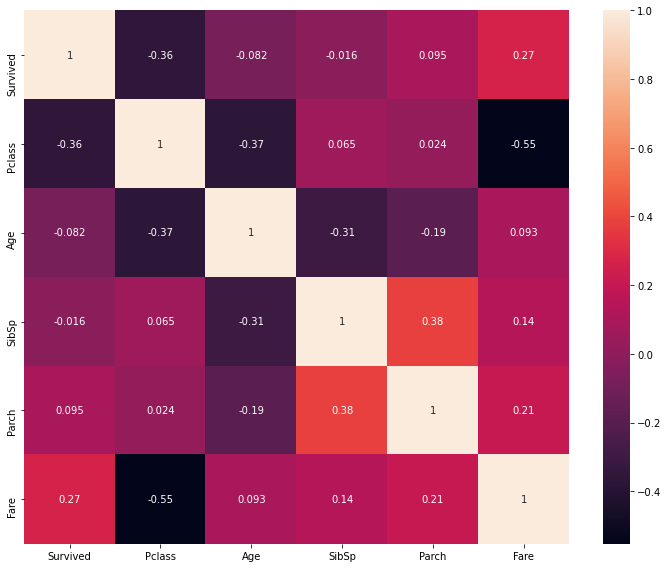

In [22]:
plt.figure(figsize = (10, 8))
sns.heatmap(datasets_corr, annot=True)
plt.tight_layout()
plt.show()

In [23]:
pd.crosstab(datasets['Pclass'], datasets['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [24]:
pd.crosstab(datasets['Age'], datasets['Survived'])

Survived,0,1
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
...,...,...
70.00,2,0
70.50,1,0
71.00,2,0


In [25]:
def checkCrossTab(datasets, target_column):
    print('Cross tab check. \n\n')
    columns = ['Pclass', 'Sex', 'SibSp', 'Parch','Embarked']
    for i in columns:
        print(pd.crosstab(datasets[i],datasets[target_column]))
        print('\n')

In [26]:
checkCrossTab(datasets, 'Survived')

Cross tab check. 


Survived    0    1
Pclass            
1          64  120
2          90   83
3         270   85


Survived    0    1
Sex               
female     64  195
male      360   93


Survived    0    1
SibSp             
0         296  173
1          86   97
2          14   11
3           8    4
4          15    3
5           5    0


Survived    0    1
Parch             
0         335  184
1          49   61
2          29   39
3           2    3
4           4    0
5           4    1
6           1    0


Survived    0    1
Embarked          
C          51   79
Q          20    8
S         353  201




In [27]:
datasets[datasets.isnull().any(axis = 1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [28]:
def visualizations(datasets, target):
    print('Datasets Visualizations. \n\n')
    columns = ['Pclass', 'Sex', 'Age','SibSp', 'Parch','Fare','Embarked']
    for i in columns:
        fig, ax = plt.subplots(figsize = (10, 8))
        plt.scatter(datasets[i], datasets[target])
        plt.xlabel(str(i))
        plt.ylabel(target)
        plt.tight_layout()
        plt.grid(True)
        plt.show()
        print('*********************************************')
        print('\n')

Datasets Visualizations. 




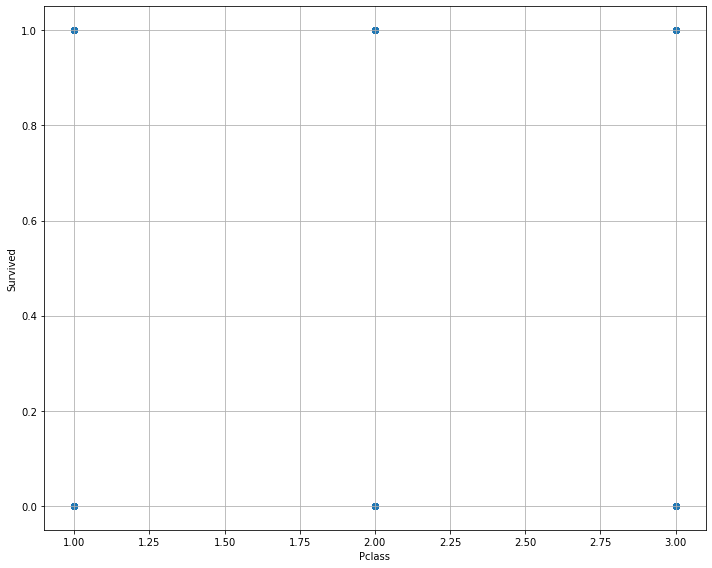

*********************************************




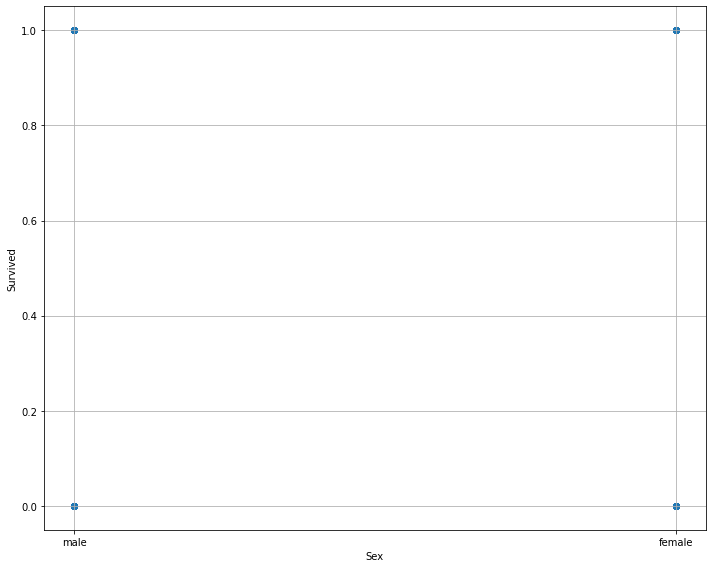

*********************************************




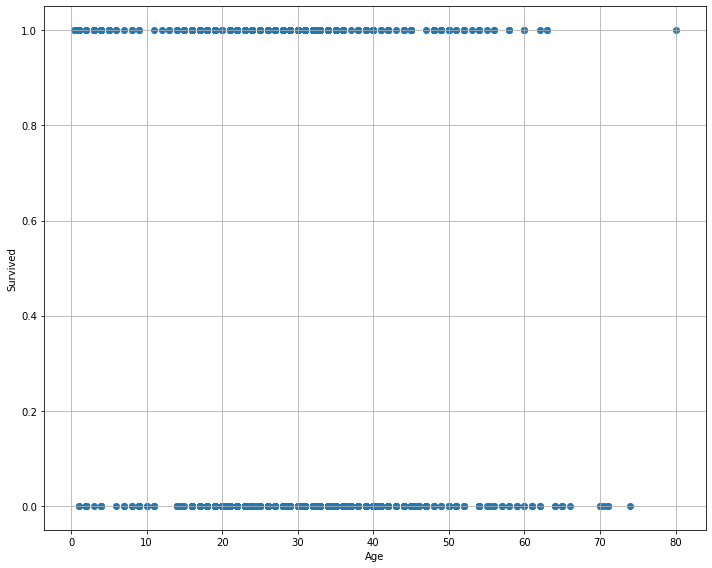

*********************************************




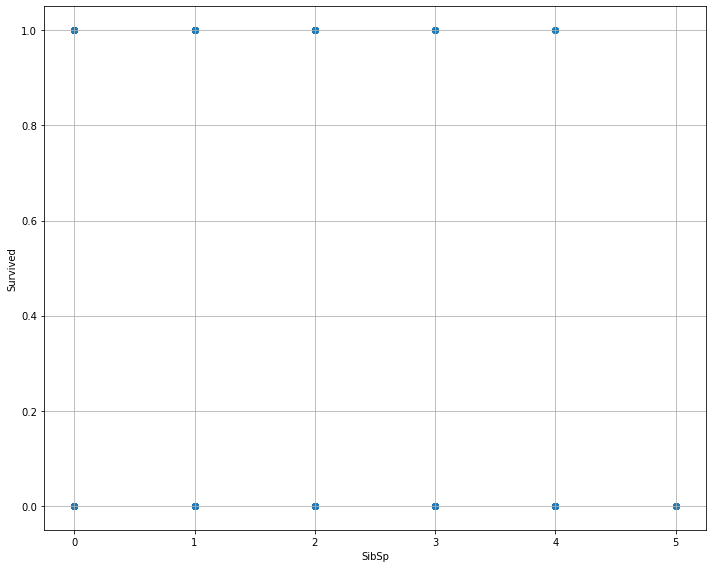

*********************************************




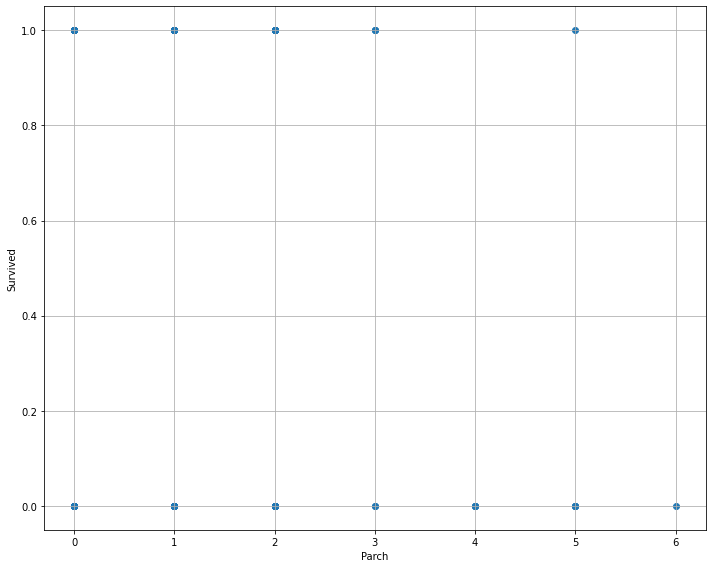

*********************************************




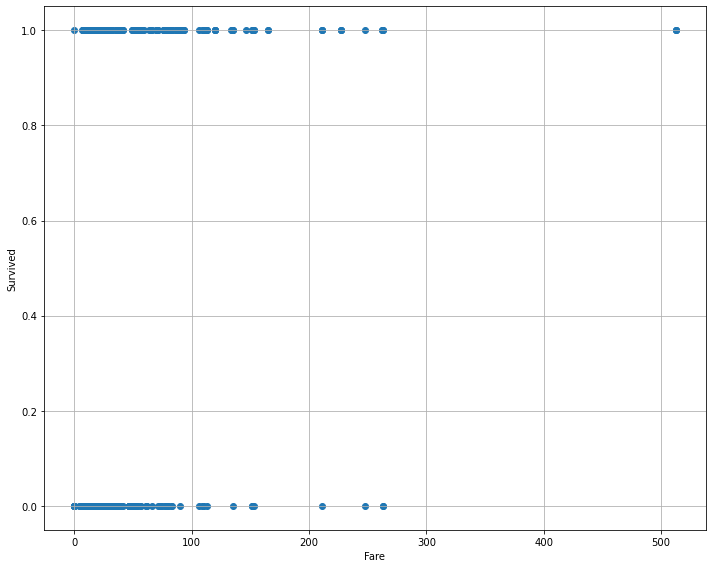

*********************************************




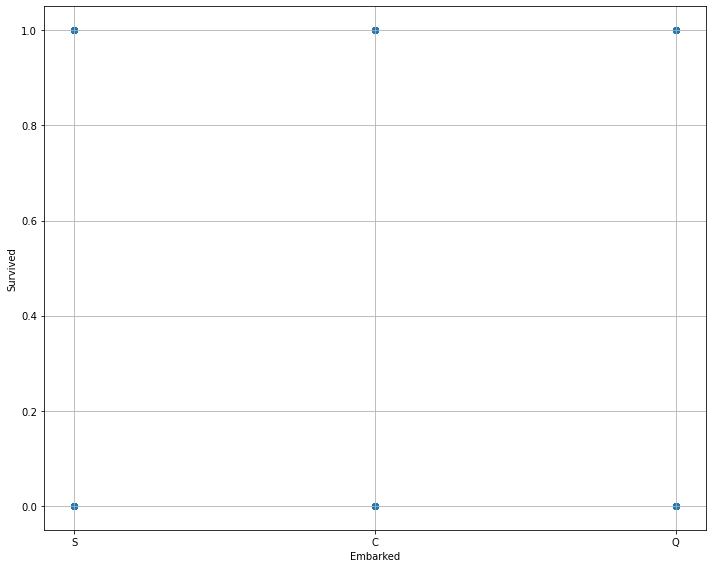

*********************************************




In [29]:
visualizations(datasets, 'Survived')

###  Preprocessing

In [30]:
label_encoding = LabelEncoder()
datasets['Sex'] = label_encoding.fit_transform(datasets['Sex'].astype(str))
datasets.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [31]:
datasets.Sex.value_counts()

1    453
0    259
Name: Sex, dtype: int64

In [32]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

In [33]:
datasets['Embarked'] = pd.get_dummies(datasets, columns = ['Embarked'])
datasets.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,0.0


In [34]:
datasets_new = datasets.sample(frac = 1).reset_index(drop = True)
datasets_new.to_csv('../../../DataSets/Titanic_Procced.csv', index = False)
datasets_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,0,34.0,1,1,32.5000,1.0
1,1,2,0,40.0,0,0,13.0000,1.0
2,0,1,1,46.0,0,0,79.2000,0.0
3,0,3,1,22.0,0,0,7.2500,0.0
4,1,3,0,1.0,1,1,11.1333,1.0


In [35]:
datasets_new.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
707,1,1,1,51.00,0,0,26.5500,1.0
708,1,1,0,16.00,0,1,57.9792,1.0
709,0,3,1,30.00,0,0,8.0500,0.0
710,0,2,1,46.00,0,0,26.0000,0.0
711,1,3,0,0.75,2,1,19.2583,1.0


###  Binary_Classification_Logistic_Regression

In [36]:
datasets = pd.read_csv('../../../DataSets/Titanic_Procced.csv')

In [37]:
datasets.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,0,34.0,1,1,32.5000,1.0
1,1,2,0,40.0,0,0,13.0000,1.0
2,0,1,1,46.0,0,0,79.2000,0.0
3,0,3,1,22.0,0,0,7.2500,0.0
4,1,3,0,1.0,1,1,11.1333,1.0


In [38]:
datasets.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [39]:
datasets.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [40]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int64  
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 44.6 KB


In [41]:
datasets[datasets.isnull().any(axis = 1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [42]:
datasets.shape

(712, 8)

In [43]:
X = datasets.drop('Survived', axis = 1)
y = datasets['Survived']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [45]:
print('X train datasets shape : \t', x_train.shape)
print('X test datasets shape : \t', x_test.shape)
print()
print('Y train datasets shape : \t', y_train.shape)
print('Y test datasets shape : \t', y_test.shape)

X train datasets shape : 	 (569, 7)
X test datasets shape : 	 (143, 7)

Y train datasets shape : 	 (569,)
Y test datasets shape : 	 (143,)


In [46]:
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver = 'liblinear')
logistic_model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [47]:
y_predict = logistic_model.predict(x_test)

### Confusion_metrix

In [48]:
predicted_result = pd.DataFrame({'y_test': y_test,
                                'Y_predict': y_predict})
predicted_result.head()

,y_test,Y_predict
338,1,1
142,0,0
242,0,0
235,0,0
468,0,0


In [49]:
datasets_crossTab = pd.crosstab(predicted_result.Y_predict, predicted_result.y_test)

In [50]:
print('Mean Squared Error : \t', mean_squared_error(y_test, y_predict))
print('Mean Absoulate Squared Error : \t', mean_absolute_error(y_test, y_predict))
print('R^2 error: \t', r2_score(y_test, y_predict))
print('************')
print('Accuracy Score:\t', accuracy_score(y_test, y_predict))
print('Precision Score:\t', precision_score(y_test, y_predict))
print('Recall Score:\t', recall_score(y_test, y_predict))

Mean Squared Error : 	 0.0
Mean Absoulate Squared Error : 	 0.0
R^2 error: 	 1.0
************
Accuracy Score:	 1.0
Precision Score:	 1.0
Recall Score:	 1.0


In [51]:
datasets_crossTab

y_test,0,1
Y_predict,,
0,88,0
1,0,55


In [52]:
TP = datasets_crossTab[1][1]
TN = datasets_crossTab[0][0]
FP = datasets_crossTab[0][1]
FN = datasets_crossTab[1][0]

In [53]:
accuracy_score_verified = (TP + TN)/ (TP + FP + TN + FN)
precision_score_verified = TP/(TP+FP)
recall_score_verified = TP/(TP + FN)

In [54]:
print(accuracy_score_verified)
print(precision_score_verified)
print(recall_score_verified)

1.0
1.0
1.0


In [55]:
model = sm.OLS(y,X)

In [56]:
results= model.fit()

In [57]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.838e+29
Date:                Thu, 16 Jul 2020   Prob (F-statistic):                        0.00
Time:                        02:48:26   Log-Likelihood:                          22070.
No. Observations:                 712   AIC:                                 -4.413e+04
Df Residuals:                     705   BIC:                                 -4.409e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass      2.368e-16   2.89e-16      0.818      0.413   -3.31e-16    8.05e-16
Sex         -5.69e-16   7.39e-16     -0.770      0.442   -2.02e-15    8.82e-16
Age         5.749e-17    1.9e-17      3.021      0.003    2.01e-17    9.49e-17
SibSp       2.715e-16   3.77e-16      0.720      0.472   -4.69e-16    1.01e-15
Parch      -1.041e-16   4.17e-16     -0.249      0.803   -9.23e-16    7.15e-16
Fare        1.116e-16   6.82e-18     16.358      0.000    9.82e-17    1.25e-16
Embarked       1.0000    6.9e-16   1.45e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      693.164   Durbin-Watson:                   0.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27082.189
Skew:                          -4.461   Prob(JB):                         0.00
Kurtosis:                      31.867   Cond. No.                         180.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 1.000      
Dependent Variable:     Survived         AIC:                         -44125.9725
Date:                   2020-07-16 02:48 BIC:                         -44093.9960
No. Observations:       712              Log-Likelihood:              22070.     
Df Model:               7                F-statistic:                 5.838e+29  
Df Residuals:           705              Prob (F-statistic):          0.00       
R-squared (uncentered): 1.000            Scale:                       7.0472e-29 
-----------------------------------------------------------------------------------
              Coef.    Std.Err.             t             P>|t|     [0.025   0.975]
-----------------------------------------------------------------------------------
Pclass        0.0000     0.0000                  0.8182   0.4135   -0.0000   0.0000
Sex          -0.0000     0.0000                 -0.7698   0.4417   -0.0000   0.0000
Age           0.0000     0.0000                  3.0206   0.0026    0.0000   0.0000
SibSp         0.0000     0.0000                  0.7198   0.4719   -0.0000   0.0000
Parch        -0.0000     0.0000                 -0.2494   0.8031   -0.0000   0.0000
Fare          0.0000     0.0000                 16.3578   0.0000    0.0000   0.0000
Embarked      1.0000     0.0000   1450061622096204.5000   0.0000    1.0000   1.0000
---------------------------------------------------------------------------------
Omnibus:                  693.164           Durbin-Watson:              0.995    
Prob(Omnibus):            0.000             Jarque-Bera (JB):           27082.189
Skew:                     -4.461            Prob(JB):                   0.000    
Kurtosis:                 31.867            Condition No.:              180      
=================================================================================

"""

In [59]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00        55

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

